<a href="https://colab.research.google.com/github/nirajan1111/Ml_-learning/blob/main/sales_analysis_of_ABC_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Write a python program to merge data from each month into one CSV and read in updated dataframe.

# Setting the directory where the data are avaiable
directory = '/content/gdrive/MyDrive/sales_data/'

# Initializing an empty list 
dfs = []

# Looping through each month
for month in ["January","February","March","April","May","June","July","August","September","October","November","December"
]:
    # Constructing the filename for the monthly CSV file
    filename = f'Sales_{month}_2019.csv'
    file_path = directory + filename
    
    # Reading in the CSV file as a dataframe and append it 
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenating all the dataframes into a single dataframe
merged_df = pd.concat(dfs)
merged_df.to_csv('merged_car_sales_data', index=False)

# Reading in the updated dataframe
updated_df = pd.read_csv('merged_car_sales_data')

In [7]:
updated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001"


In [8]:
num_missing = updated_df.isna().sum()
num_missing

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

In [9]:
# removing NaN missing values from updated data frame
updated_df = updated_df.dropna()


In [10]:
num_missing = updated_df.isna().sum()
num_missing

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
updated_df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [14]:
# converting quantity order and Price each into numeric only
updated_df['Quantity Ordered'] = updated_df['Quantity Ordered'].astype(int)
updated_df['Price Each'] = updated_df['Price Each'].astype(float)

In [13]:
num_missing = updated_df.isna().sum()
num_missing

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
#Creating a new column named Month from Ordered Date of updated  dataframe and converting it to integer as data type
# Converting Order Date column to datetime format

updated_df['Order Date'] = pd.to_datetime(updated_df['Order Date'], format='%m/%d/%Y %H:%M')

# Extracting month from Order Date and creating a new column
updated_df['Month'] = updated_df['Order Date'].dt.month
updated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12
186846,319667.0,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
186847,319668.0,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12
186848,319669.0,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12


In [16]:
updated_df.dtypes


Order ID                   float64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [17]:
#Creating a new column named City from Purchase Address based on the value in updated dataframe.	
address_df = pd.DataFrame({'address': updated_df["Purchase Address"]})

# Using str.split() to split the "address" column into City, state zip columns
address_df[['street', 'City', 'state zip']] = address_df['address'].str.split(', ', expand=True)
updated_df = updated_df.join(address_df["City"])


In [19]:
updated_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin


In [21]:
#Showing summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable.

stats = updated_df["Price Each"].describe()
price_each_skewness = skew(updated_df["Price Each"])
price_each_kurtosis = kurtosis(updated_df["Price Each"])
print(f"{stats}, kurtosis of price each is{price_each_kurtosis},skewness if price each variable is {price_each_skewness}")

count    185950.000000
mean        184.399735
std         332.731330
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price Each, dtype: float64, kurtosis of price each is9.094291533043448,skewness if price each variable is 2.872125560523709


In [22]:
# Calculating the correlation matrix for the variables
correlation_matrix = updated_df.corr()

# Printing the correlation matrix
print(correlation_matrix)

                  Order ID  Quantity Ordered  Price Each     Month
Order ID          1.000000          0.000702   -0.002857  0.993063
Quantity Ordered  0.000702          1.000000   -0.148272  0.000791
Price Each       -0.002857         -0.148272    1.000000 -0.003375
Month             0.993063          0.000791   -0.003375  1.000000


The best sales month is 12
Total earnings in the best sales month: 4588415.41


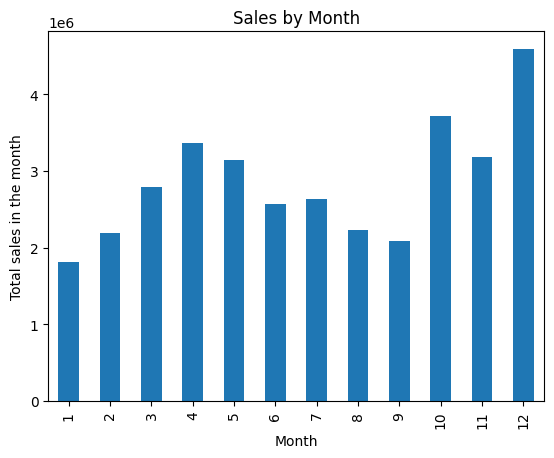

In [23]:
# Grouping sales_data by month and summing it
sales_by_month = updated_df.groupby('Month')['Price Each'].sum()

# Finding the month with the highest sales
best_month = sales_by_month.idxmax()

# Calculating the total earnings in the best month
earnings_in_best_month = sales_by_month.loc[best_month]

print("The best sales month is", best_month)
print("Total earnings in the best sales month:", earnings_in_best_month)



# Creating a bar graph of the sales by month
sales_by_month.plot(kind='bar')

# Setting the x-label and y-label of the graph
plt.xlabel('Month')
plt.ylabel('Total sales in the month')
plt.title('Sales by Month')

# Show the graph
plt.show()

In [27]:
# Finding city which sold the highest product
# Groupping the data by city and summing it
sales_by_city = updated_df.groupby('City')['Price Each'].sum()

# Sorting the sales by city in descending order and taking the first row which is highest
highest_sales_city = sales_by_city.sort_values(ascending=False).iloc[0]

# Getting the name of the city with the highest sales
city_with_highest_sales = sales_by_city[sales_by_city == highest_sales_city].index[0]

# Printing the city with the highest sales
print(f"The city with the highest sales is {city_with_highest_sales}.")


The city with the highest sales is San Francisco.


The product that was sold the most is AAA Batteries (4-pack).


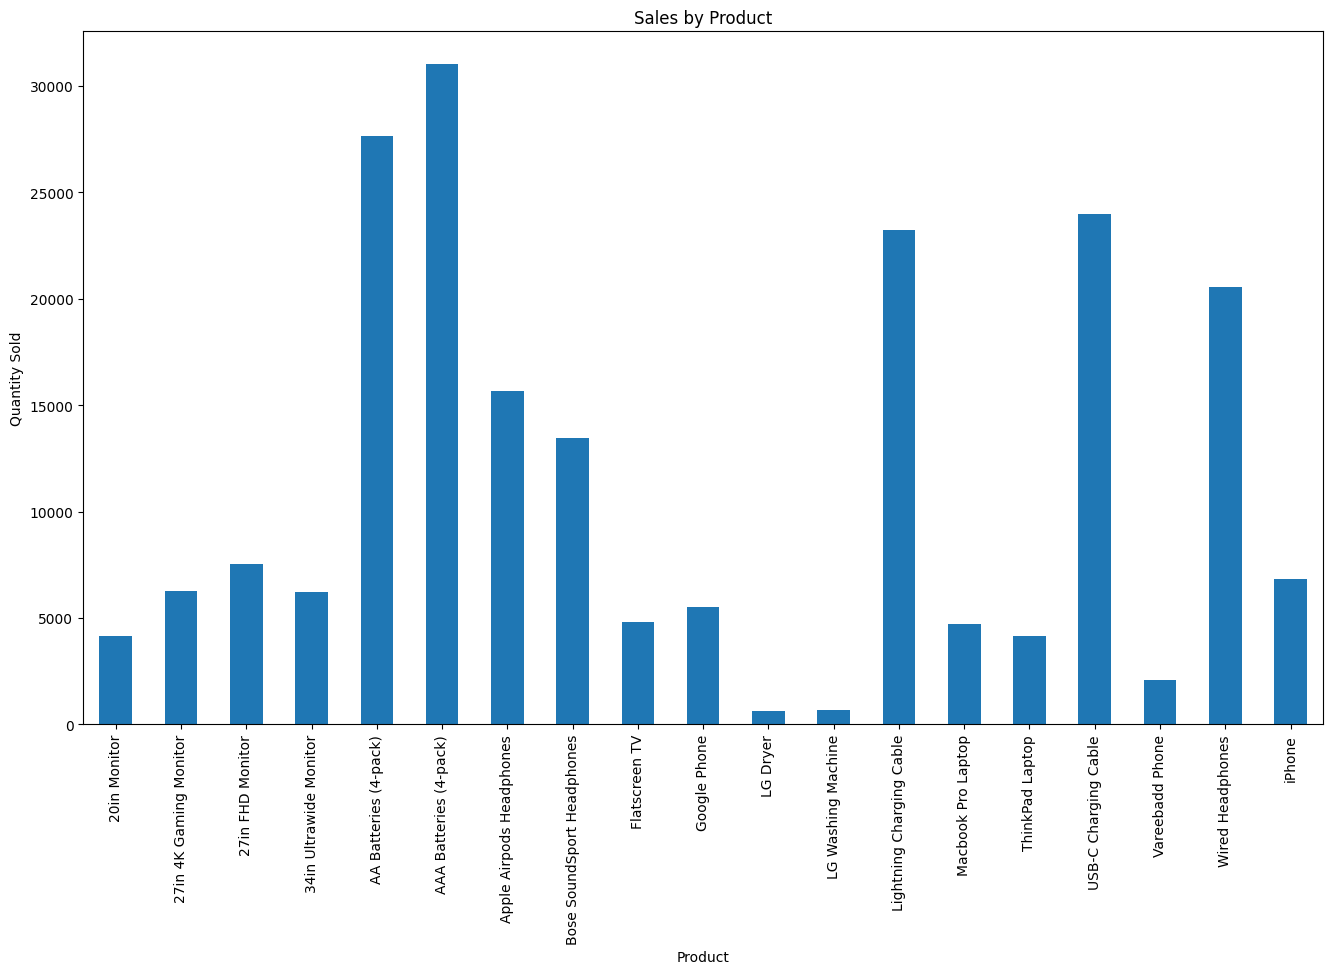

In [28]:
# Groupping the data by product and calculating the total quantity ordered
sales_by_product = updated_df.groupby('Product')['Quantity Ordered'].sum()

# Sorting the sales by product in descending order and take the first row where it is highest
most_sold_product = sales_by_product.sort_values(ascending=False).iloc[0]

# Getting the name of the product that was sold the most
product_name = sales_by_product[sales_by_product == most_sold_product].index[0]

# Printing the product that was sold the most
print(f"The product that was sold the most is {product_name}.")

# Creating a bar plot of sales by product
sales_by_product.plot(kind='bar', figsize=(16, 9))

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.title('Sales by Product')

# Show the plot
plt.show()


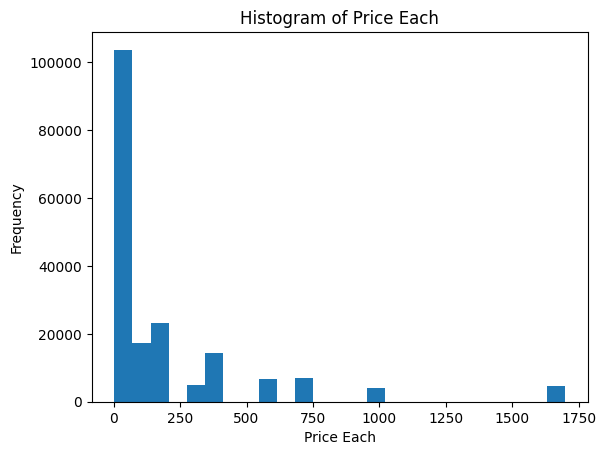

In [29]:
#showing histogram plot of Price Each variables
variable="Price Each"
plt.hist(updated_df[variable], bins=25)
plt.xlabel(variable)
plt.ylabel('Frequency')
plt.title('Histogram of ' + variable)
plt.show()